In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


np.random.seed(1)

#  Statistical Hypothesis Testing

The assumption of a statistical test is called the null hypothesis, or hypothesis zero (H0 for
short). It is often called the default assumption, or the assumption that nothing has changed.
A violation of the test’s assumption is often called the first hypothesis, hypothesis one or H1 for
short. H1 is really a short hand for some other hypothesis, as all we know is that the evidence
suggests that the H0 can be rejected.

* Hypothesis 0 (H0): Assumption of the test fails to be rejected.

* Hypothesis 1 (H1): Assumption of the test does not hold and is rejected at some level
of significance.

## Errors in Statistical Tests

* Оши́бка пе́рвого ро́да (α-ошибка, FP) — ситуация, когда отвергнута верная нулевая гипотеза (об отсутствии связи между явлениями или искомого эффекта).

* Оши́бка второ́го ро́да (β-ошибка, FN) — ситуация, когда принята неверная нулевая гипотеза.

## P-value

Significance level (α) – is a probability to reject a null hypothesis under the assumption H_{0} is correct.

```
 α = P(H_1 | H_{0}) or FP
```

P-value – the significance level to reject H_{0} UNDER THE OBSERVED DATA or even worser cases.

If the p −value is less than our fixed significance level at which we test the hypothesis, then the null hypothesis should be rejected, if there is no reason to reject the null hypothesis more than that.


```

e.g. min{P(H_1 | H_{0})} <=  α 

: the risk (probability) of rejecting right H_{0} given observed data is less than we required (α), so we can do it.

P(T > t | H_{0}) for right-tail test


```

* p-value ≤ alpha or significant level, reject null hypothesis (H1).
* p-value > alpha fail to reject the null hypothesis (H0).

Hint: think of p_value as P(data | H_{0})

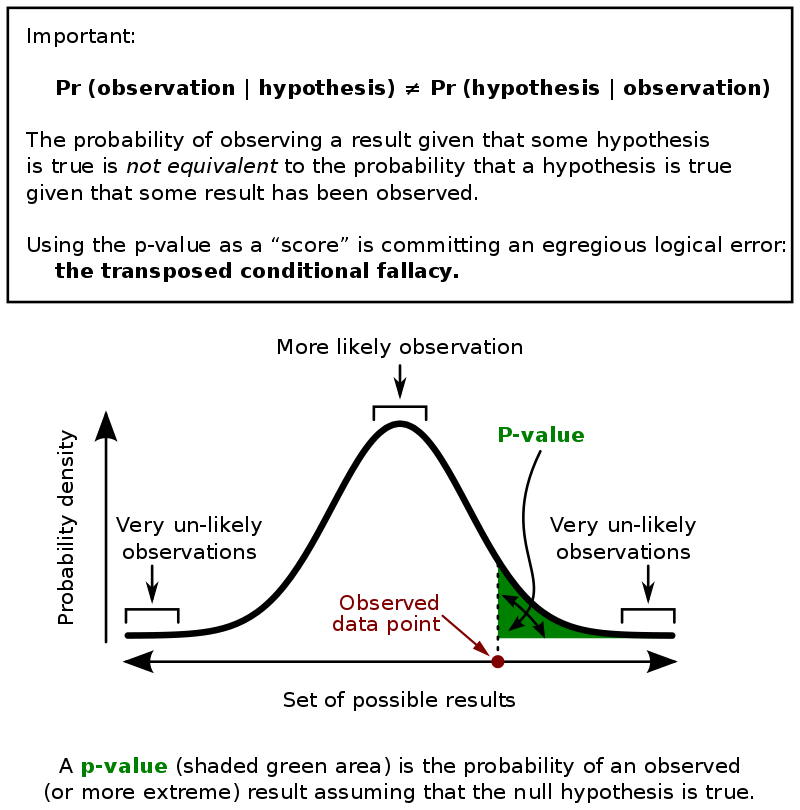

In [32]:
def H_0_rejected_or_not(significant_lvl, p_value):
    if p_value <= significant_lvl:
        output = f'H_{0} is rejected as p_value = {p_value} <= significant_lvl = {significant_lvl}'
    else:
        output = f'H_{0} is not rejected as p_value = {p_value} > significant_lvl = {significant_lvl}'
        
    return output

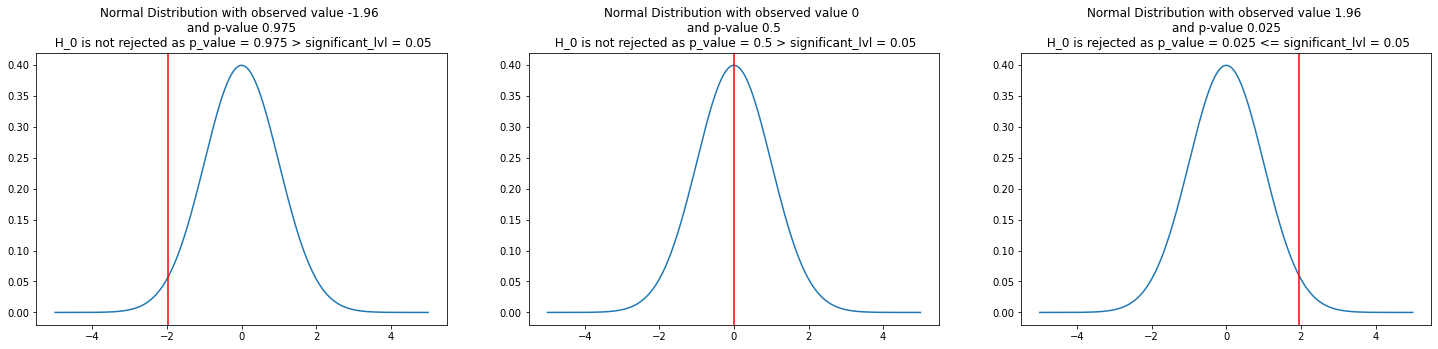

In [33]:
significant_lvl=0.05


x = np.linspace(-5, 5, 1000)
_pdf = norm.pdf(x)

observed_values = [-1.96, 0, 1.96]

fig, axes = plt.subplots(1, 3, figsize=(25, 5))


for observed_value, ax in zip(observed_values, axes):
    ax.plot(x, _pdf)
    

    p_value = np.round(1 - norm.cdf(observed_value), 3)
    ax.axvline(observed_value, color='r')
    
    test_result = H_0_rejected_or_not(significant_lvl, p_value)
    ax.set_title(f'Normal Distribution with observed value {observed_value} \n and p-value {p_value} \n ' + test_result)
    
    
plt.show()
    

## We want to determine whether our sample mean (350) indicates that this year's average energy cost is significantly different from last year’s average energy cost of $260.


* Hypothesis 0 (H0): mean = 260

* Hypothesis 1 (H1): mean != 260

In 2023 the average energy cost is  350


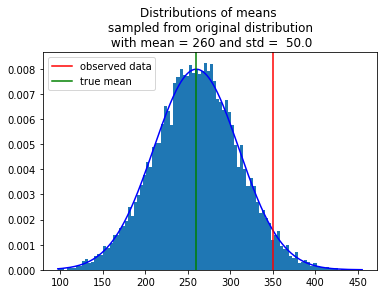

In [143]:
NIMBER_OF_EXPERIMENTS=10000

SAMPLE_SIZE=100
TRUE_MEAN = 260
STD = 500

OBSERVED_MEAN_2023 = 350
print('In 2023 the average energy cost is ', OBSERVED_MEAN_2023)
sampled_means = [np.mean(np.random.normal(TRUE_MEAN, STD, size=SAMPLE_SIZE)) for _ in range(NIMBER_OF_EXPERIMENTS)]

_pdf, observed_means, _ = plt.hist(sampled_means, bins=100, density=True)


#central limit theorem
plt.plot(sorted(sampled_means), norm.pdf(sorted(sampled_means), TRUE_MEAN, STD / np.sqrt(SAMPLE_SIZE)), color='blue')

plt.title(f'Distributions of means \n sampled from original distribution \n with mean = {TRUE_MEAN} and std =  {STD / np.sqrt(SAMPLE_SIZE)}')
plt.axvline(OBSERVED_MEAN_2023, color='r', label='observed data')
plt.axvline(TRUE_MEAN, color='g', label='true mean')
plt.legend()
plt.show()

## WHAT IS THE SIGNIFICANCE LEVEL (ALPHA)?

The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.


The significance level determines how far out from the null hypothesis value we'll draw that line on the graph. To graph a significance level of 0.05, we need to shade the 5% of the distribution that is furthest away from the null hypothesis.

### Hint: you can see, that in critical region the probabiliy of obtianing such a result is low.

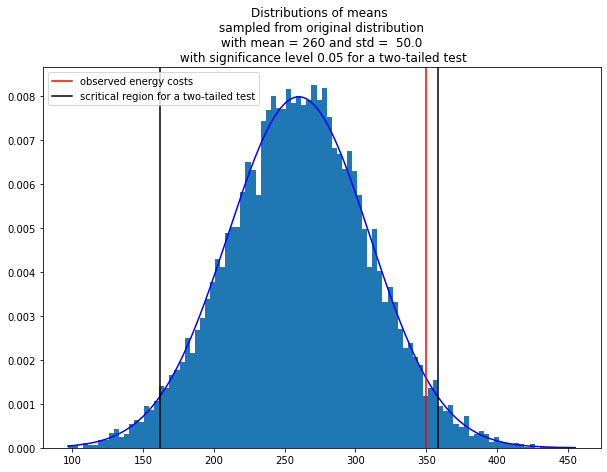

In [164]:
alpha= 0.05

LEFT_BORER = norm.ppf(alpha / 2, loc=TRUE_MEAN, scale=STD / np.sqrt(SAMPLE_SIZE))
RIGHR_BORDER = norm.ppf(1 - (alpha / 2), loc=TRUE_MEAN, scale=STD / np.sqrt(SAMPLE_SIZE))

plt.figure(figsize=(10, 7))
plt.title(f'Distributions of means \n sampled from original distribution \n with mean = {TRUE_MEAN} and std =  {STD / np.sqrt(SAMPLE_SIZE)} \n with significance level {alpha} for a two-tailed test')


_pdf, observed_means, _ = plt.hist(sampled_means, bins=100, density=True)
plt.plot(sorted(sampled_means), norm.pdf(sorted(sampled_means), TRUE_MEAN, STD / np.sqrt(SAMPLE_SIZE)), color='blue')

plt.axvline(OBSERVED_MEAN_2023, color='r', label='observed energy costs')


plt.axvline(LEFT_BORER, color='black', label='scritical region for a two-tailed test')
plt.axvline(RIGHR_BORDER, color='black')

plt.legend()

# WHAT ARE P-VALUES HERE?

This probability represents the likelihood of obtaining a sample mean that is at least as extreme as our sample mean in both tails of the distribution if the population mean is 260. That’s our P value!

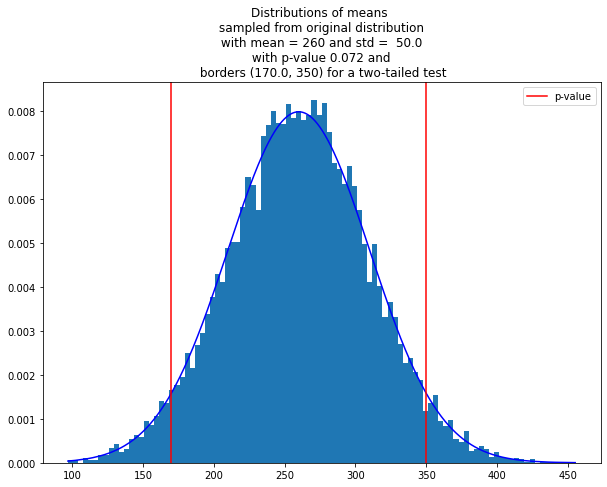

In [154]:
############
# p-value
###########

RIGHR_BORDER = OBSERVED_MEAN_2023
right_region = 1 - norm.cdf(RIGHR_BORDER, loc=TRUE_MEAN, scale=STD / np.sqrt(SAMPLE_SIZE))

LEFT_BORER = norm.ppf(right_region, loc=TRUE_MEAN, scale=STD / np.sqrt(SAMPLE_SIZE))

p_value = np.round(2 * right_region, 3)
###########
plt.figure(figsize=(10, 7))
plt.title(f'Distributions of means \n sampled from original distribution \n with mean = {TRUE_MEAN} and std =  {STD / np.sqrt(SAMPLE_SIZE)} \n with p-value {p_value} and \n borders {LEFT_BORER, RIGHR_BORDER} for a two-tailed test')


_pdf, observed_means, _ = plt.hist(sampled_means, bins=100, density=True)
plt.plot(sorted(sampled_means), norm.pdf(sorted(sampled_means), TRUE_MEAN, STD / np.sqrt(SAMPLE_SIZE)), color='blue')



plt.axvline(LEFT_BORER, color='r', label='p-value')
plt.axvline(RIGHR_BORDER, color='r')
plt.legend()

# DISCUSSION ABOUT STATISTICALLY SIGNIFICANT RESULTS


In [165]:
alpha= 0.05

print(H_0_rejected_or_not(alpha, p_value))
print(f'The risk of rejecting right H_{0} is too high ({round(100 * p_value)}%), and we want only 5%')
print('Energy cost is NOT different from last year’s average energy cost of $260.')

H_0 is not rejected as p_value = 0.072 > significant_lvl = 0.05
The risk of rejecting right H_0 is too high (7%), and we want only 5%
Energy cost is NOT different from last year’s average energy cost of $260.


## Resources used:

https://blog.minitab.com/en/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics